<a href="https://colab.research.google.com/github/shahnawazsyed/MAT422/blob/main/Calculus_and_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.2 Calculus and Optimization**


*   Limits and continuity
*   Derivatives
*   Taylor's theorem



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# **Limits and continuity**

For a real-values function $f: D → ℜ$ on $D⊆ℜ^{d}$, $f$ has a limit as $x$ approaches $a$ if for any ϵ > 0, there exists a δ > 0 such that $|f(x)-L|<\epsilon$ for all $x ∈ D ∩ B_{\delta}(a)$$\backslash{a}$

This is defined as: $\underset{x→a}{lim}f(x) = L$

A function is said to be continuous if it does not have any discontinuities, or abrupt changes in value.

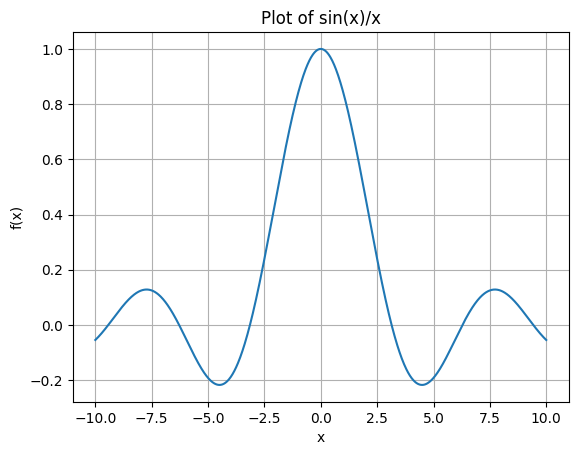

In [4]:
#f(x) = sinx/x
def f(x):
    return np.sin(x)/x

#create x values and y values
x = np.linspace(-10, 10, 1000)
y = f(x)

#Graph f(x)
plt.plot(x, y)
plt.title("Plot of sin(x)/x")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

We can inspect this graph specifically around x=0 to evaluate $\underset{x→0}{lim}f(x)$:

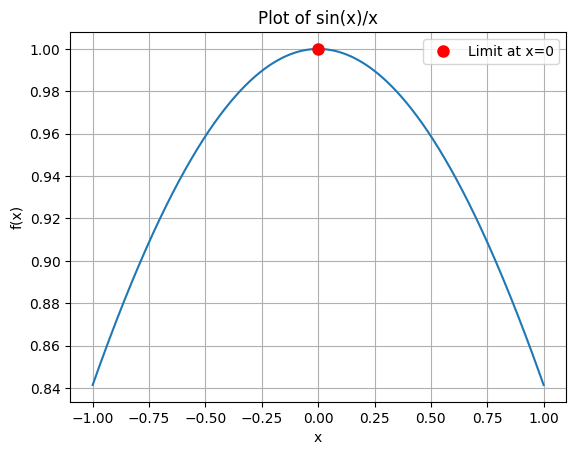

In [5]:
#generate x and y values
x = np.linspace(-1, 1, 1000)
y = f(x)

plt.plot(x, y)
plt.plot(0, 1, 'ro', markersize=8, label='Limit at x=0')
plt.title("Plot of sin(x)/x")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

# **Derivatives**

For functions of a single variable, the derivative at x is given by:

$f'(x) = \frac{df{x_0}}{x_0}= \underset{h→0}{lim}\frac{f(x_{0}+h)-f(x_0)}{h}$, assuming the limit exists.

In [6]:
def f(x):
    return x**2
def derivative(f, x, h):
    return (f(x+h)-f(x))/h
print("f'(2):", round(derivative(f, 2, 0.0000001), 4))

f'(2): 4.0


Mean value theorem: if $f$ is continuous and differentiable on $(a,b)$, there exists a $a<c<b$ such that $f'(c)$ = $\frac{f(b)-f(a)}{b-a}$

We define the line with slope $\frac{f(b)-f(a)}{b-a}$ as the secant line.

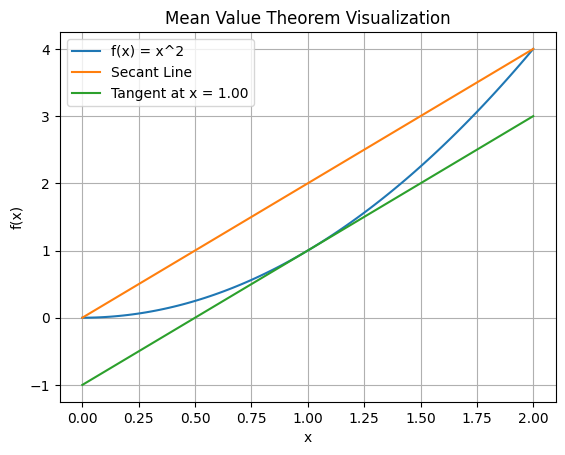

In [7]:
def mean_value_theorem(f, a, b):
    return (f(b) - f(a)) / (b - a)

a = 0
b = 2

secant_slope = mean_value_theorem(f, a, b) #secant line

c = secant_slope / 2 #solve for c
x = np.linspace(a, b, 100)

plt.plot(x, f(x), label='f(x) = x^2')
plt.plot([a, b], [f(a), f(b)], label='Secant Line')
plt.plot(x, derivative(f, c, 0.0001) * (x - c) + f(c), label=f"Tangent at x = {c:.2f}")


plt.title("Mean Value Theorem Visualization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

# **Taylor's Theorem**



For a function $f$ with D ⊆ R, which is $m$ times differentiable on [a,b]:

$f(b) = f(a) + (b-a)f'(a) + \frac{1}{2}(b-a)^2f''(a)+...+\frac{(b-a)^{m-1}}{(m-1)!}f^{(m-1)}(a)+R_m$

 where $R_m = \frac{(b-a)^m}{(m)!}f^{m}(a+θ(b-a))$ for some $0 < θ < 1$

In [8]:
def f(x):
    return np.sin(x)
def f_prime(x):
    return np.cos(x)
def f_double_prime(x):
    return -np.sin(x)

In [9]:
def taylor_polynomial(x, a, order): #for demonstration purposes, goes up to the third derivative
    terms = [f(a)]
    for i in range(1, order + 1):
        if i == 1:
            term = f_prime(a) * (x - a) ** i / math.factorial(i)
        elif i == 2:
            term = f_double_prime(a) * (x - a) ** i / math.factorial(i)
        elif i == 3:
            term = -np.cos(a) * (x - a) ** i / math.factorial(i)
        terms.append(term)

    return sum(terms)

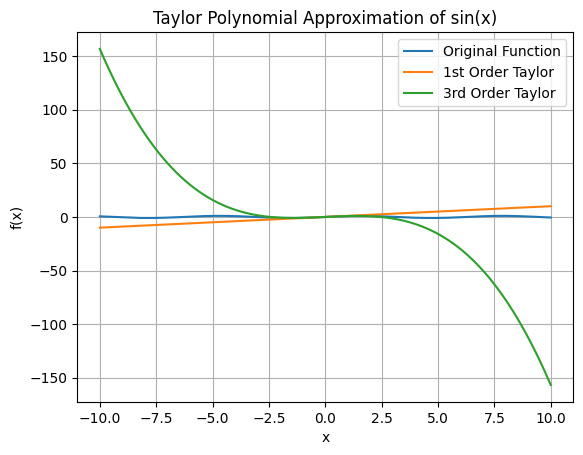

In [10]:
x_vals = np.linspace(-10, 10, 200)

y_original = f(x_vals)
#Taylor approximations
y_taylor_1st = taylor_polynomial(x_vals, 0, 1) #1st order
y_taylor_3rd = taylor_polynomial(x_vals, 0, 3) #2nd order

# Plot the results
plt.plot(x_vals, y_original, label='Original Function')
plt.plot(x_vals, y_taylor_1st, label='1st Order Taylor')
plt.plot(x_vals, y_taylor_3rd, label='3rd Order Taylor')

plt.title("Taylor Polynomial Approximation of sin(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()